# E-tivity 2 (06/02/23 - 19/02/23)

* Your Name

* Your Student ID

## Outline

This e-tivity is split into two parts. The first part <a href="#part1">**Stock Predicition**</a> is a group activity where you are tasked with predicting the stock market.

The second <a href="#part2">**Sentiment Analysis**</a> is an individual task, the problem is to predict if a film review is positive or negative.

### Guidelines

The e-tivity is split into five tasks. The first four are "group" excersises, in that you post the solutions to Tasks 1-4 to Gitlab. This will allow the members of your group to send you feedback (via the forums) so you can improve your submission. The final task is an individual task and together with the other tasks, should be uploaded to Sulis but not to gitlab.

Marks will be deducted if task 5 is posted to gitlab in contravention of instructions. Also if the the final submission is not a single notebook with tasks 1-5 and with correct identification or filename.


Grading guidelines: the grades for each task are additive, max 20. Weight [5/7]

**Task 1 [0-6]**: Complete with suitable preprocessing steps. There is no unique solution but you should justify the actions you are taking.

**Task 2 [0-4]**: Complete with suitable treatment of missing values. Again there maybe more than one solution, the important thing is to justify your actions.

**Tasks 3+4 [0-4]**: Create a suitable model with correct evaluation. Test for common DL issues.

**Task 5 [0-6]**: Completion of Task 5, using the layers outlined. The purpose of the task is to demonstrate that you can construct a valid model from scratch. Direct copy and paste from the web is not acceptable.

<a id='part1'></a>
## Stock Prediction

### Context

There is a small dataset of real stock prices for each working day from the end of 2015 to the end of 2019. There are four variables (with a time stamp), stock price, oil price, gold price and Euro to Dollar exchange. You need to predict the Stock price a day ahead from only the past values of each of the 4 variables. 


### Tasks 1-4 (complete by Monday 13/02/23)

These tasks are to be completed and uploaded to GitLab on which the other group members can comment. The forum activity will form part of the overall mark for the e-tivity.

**Task 1: data preprocessing**

Explain any preprocessing steps you take including but limited to reformatting and also how you have selected the training and test sets. The test set should be 20% of the whole.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


df = pd.read_csv("stock.csv")
df.head(10)

,Date,Stock,Oil,EuroToDollar,Gold
0,2015-11-23,2089.409912,41.490002,0.9432,1124.7
1,2015-11-24,2084.419922,42.040001,0.9388,1131.6
2,2015-11-25,2089.300049,42.689999,0.9420,1128.4
3,2015-11-27,2088.820068,43.250000,0.9438,1114.5
4,2015-11-30,2090.949951,41.770000,0.9468,1123.9
5,2015-12-01,2082.929932,41.730000,0.9416,1122.0
6,2015-12-02,2101.709961,41.689999,0.9458,1112.4
7,2015-12-03,2080.709961,40.150002,0.9173,1120.6
8,2015-12-04,2051.239990,41.310001,0.9188,1143.2
9,2015-12-07,2090.419922,40.099998,0.9225,1134.3


In [2]:
print(df.isna().sum())

Date             0
Stock            0
Oil             10
EuroToDollar    12
Gold             0
dtype: int64


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


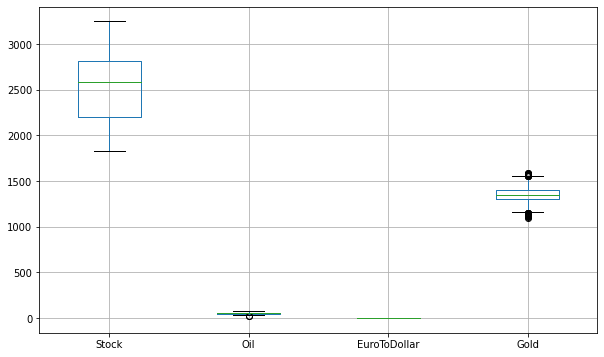

In [3]:
plt.figure(figsize=(10, 6))
df.boxplot()
plt.show()

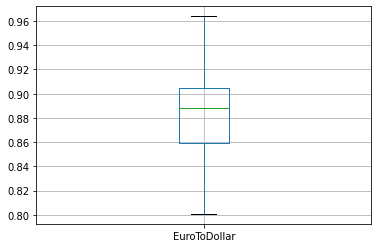

In [4]:
df.boxplot(column=['EuroToDollar']) 

In [5]:
# def encode_cyclic_date(df, date_col):
#     df[date_col] = pd.to_datetime(df[date_col])
#     df['sin_year'] = np.sin(2 * np.pi * df[date_col].dt.year / df[date_col].dt.year.max())
#     df['cos_year'] = np.cos(2 * np.pi * df[date_col].dt.year / df[date_col].dt.year.max())
#     df['sin_month'] = np.sin(2 * np.pi * df[date_col].dt.month / 12)
#     df['cos_month'] = np.cos(2 * np.pi * df[date_col].dt.month / 12)
#     df['sin_day'] = np.sin(2 * np.pi * df[date_col].dt.day / df[date_col].dt.day.max())
#     df['cos_day'] = np.cos(2 * np.pi * df[date_col].dt.day / df[date_col].dt.day.max())
#     return df.drop(date_col, axis=1)

# df_encoded = encode_cyclic_date(df, 'Date')
# df.head(10)

In [6]:
# this was uses hte"Date" columnas input for training while still 
#providing useful plots to visualize the trends in the data.
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
df.set_index('Date', inplace=True)
# df['year'] = df.index.year
# df['month'] = df.index.month
# df['day'] = df.index.day
# df['dayofweek'] = df.index.dayofweek
# df['dayofyear'] = df.index.dayofyear

In [7]:
print(df.isna().sum())

Stock            0
Oil             10
EuroToDollar    12
Gold             0
dtype: int64


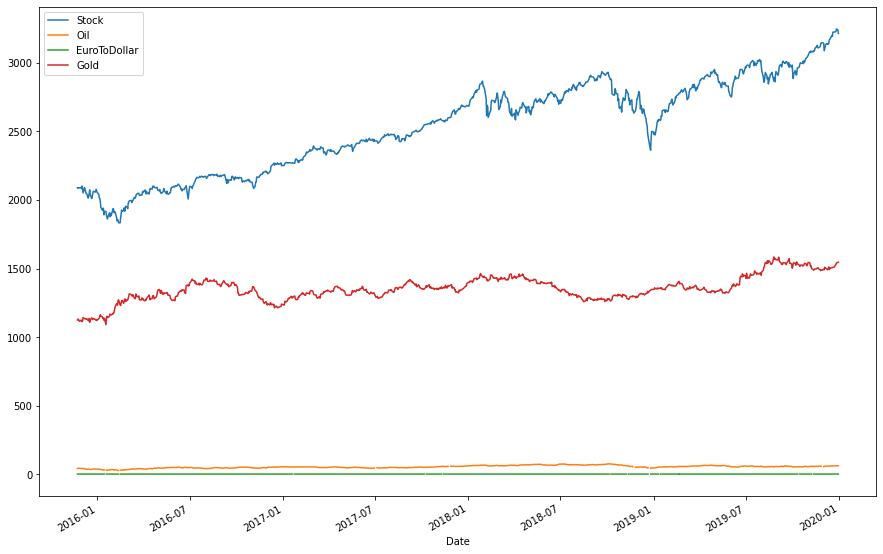

In [8]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df[['Stock', 'Oil', 'EuroToDollar', 'Gold']] = scaler.fit_transform(df[['Stock', 'Oil', 'EuroToDollar', 'Gold']])

df.plot(figsize=(15, 10))
plt.show()


**Task 2: data cleaning**

There are a number of missing values in the data. Clean the data so that it is suitable for use with the NN. Bare in mind that you want to retain the time coherency of the data as much as possible.


In [9]:
# Use linear interpolation to estimate missing values
#df.interpolate(method='linear', inplace=True)
df = df.dropna()
# Check if any missing values still exist
print(df.isna().sum())

Stock           0
Oil             0
EuroToDollar    0
Gold            0
dtype: int64


In [10]:
# df_x = df.drop(columns=['Stock'])
# df_y = df['Stock']

# print(df_x.shape)
# print(df_y.shape)

In [11]:
time_steps = 100

x = np.array([df.iloc[i:i + time_steps] for i in range(len(df) - time_steps)])
y = np.array([df.iloc[i + time_steps:i + time_steps + 1][['Stock']] for i in range(len(df) - time_steps)])
print(x.shape)
print(y.shape)

(914, 100, 4)
(914, 1, 1)


In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

x_train_max = x_train.max()
x_train_min = x_train.min()
x_train = (x_train - x_train_min) / (x_train_max - x_train_min)
x_test = (x_test - x_train_min) / (x_train_max - x_train_min)

y_train_max = y_train.max()
y_train_min = y_train.min()
y_train = (y_train - y_train_min) / (y_train_max - y_train_min)
y_test = (y_test - y_train_min) / (y_train_max - y_train_min)

**Task 3: model construction**

Construct a RNN network that will predict the future value of Stock, one day/time inteval in advance.

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Input, SimpleRNN
from tensorflow.keras.models import Model

# Define the inputs (the time sequence of feature variables)
inputs = Input(shape=(time_steps, df.shape[1]))

# Define a Simple Recurrent Neural Network
n = SimpleRNN(units=10)(inputs)

# Add a final fully connected layer to give us the prediced value
output = Dense(1, activation='linear')(n)

# Create a Simple RNN model based upon our inputs and output
simple_rnn = Model(inputs, output, name="simple_rnn")

simple_rnn.compile(loss='mse', optimizer='adam')
simple_rnn.summary()

Model: "simple_rnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 4)]          0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 10)                150       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [14]:
simple_rnn.fit(x_train, y_train, epochs=1000, batch_size=128,callbacks=[EarlyStopping(monitor='loss', patience=10)])

Epoch 1/1000
6/6 [==============================] - 2s 51ms/step - loss: 0.0356
Epoch 2/1000
6/6 [==============================] - 0s 50ms/step - loss: 0.0328
Epoch 3/1000
6/6 [==============================] - 0s 56ms/step - loss: 0.0298
Epoch 4/1000
6/6 [==============================] - 0s 52ms/step - loss: 0.0270
Epoch 5/1000
6/6 [==============================] - 0s 49ms/step - loss: 0.0240
Epoch 6/1000
6/6 [==============================] - 0s 45ms/step - loss: 0.0208
Epoch 7/1000
6/6 [==============================] - 0s 61ms/step - loss: 0.0171
Epoch 8/1000
6/6 [==============================] - 0s 57ms/step - loss: 0.0133
Epoch 9/1000
6/6 [==============================] - 0s 54ms/step - loss: 0.0094
Epoch 10/1000
6/6 [==============================] - 0s 52ms/step - loss: 0.0056
Epoch 11/1000
6/6 [==============================] - 0s 43ms/step - loss: 0.0031
Epoch 12/1000
6/6 [==============================] - 0s 65ms/step - loss: 0.0024
Epoch 13/1000
6/6 [==================

**Task 4: test**

Evaluate the model on the test set and display any change in accuracy over time, if any. Test for common issues found ion deep learning models.


In [15]:
# predictions = simple_rnn.predict(x_test)

# # Convert the predictions back to the original scale
# predictions = scaler.inverse_transform(predictions)

# # Convert the predictions back to a dataframe
# predictions = pd.DataFrame(predictions, columns=['Predicted'], index=test_data.index)
y_predictions = simple_rnn.predict(x_test)
print(y_predictions.shape)

6/6 [==============================] - 0s 6ms/step
(183, 1)


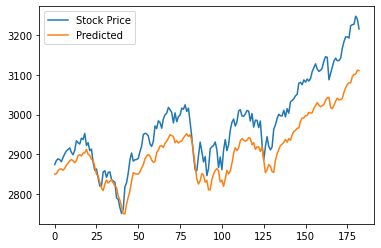

In [16]:

y_test_denormalized = y_test * (y_train_max - y_train_min) + y_train_min
y_predictions_denormalized = y_predictions * (y_train_max - y_train_min) + y_train_min
y_test_denormalized = y_test_denormalized.reshape(-1,)
y_predictions_denormalized = y_predictions_denormalized.reshape(-1,)
plt.plot(y_test_denormalized, label="Stock Price")
plt.plot(y_predictions_denormalized, label="Predicted")
plt.legend()
plt.show()

### Post (complete by Monday 13/02/23)

Post your solution to Tasks 1-4 in notebook form. If you have not completed all the tasks then that is acceptable. The purpose is to get feedback from others in the group, so if you have only a basic outline then you may get ideas about how to proceed and also examples from others in your group.

No posts should reference Task 5.

### Respond (complete by Wednesday 15/02/23)

If you feel you can provide useful advise then respond to another member of the group through the appropriate forum. Responses should be respectful and offer some sort of advise. Try and avoid clogging the forums with support or thank you messages.

In reviewing others code you will discover different ways to tackle the same problem. It is acceptable to copy parts of others code. However whole scale copying from another notebook is not acceptable.

Grading guidelines for the forum posts: Weight [2/7]

**Beginning [0-8]:** Respectful posts of minor value. Significant number of posts without valuable contributions and/or without well-considered questions. Posts about task 5 in contravention of instructions.

**Developing [9-12]:** At least 1 post  exceeding Beginning level with respectful suggestion or thought provoking question. Most posts contain valuable contributions or well-considered questions.

**Advancing [13-16]:** At least 2 posts: equal to or exceeding Beginning level;  with respectful and sound contribution highlighting mistakes or alternative approaches.

**Accomplished [17-20]:** At least 3 posts: equal to or exceeding Accomplished level; with respectful contribution of significant value. 

<a id='part2'></a>
## Sentiment Analysis


This task is a individual task and should **not** to be uploaded to GitHub. No direct support should be given via the forums, although comments about progress or results are allowed. Marks will be deducted if the instructions are not followed (see rubrics). This part should be uploaded directly to Sulis.

### Context

You have a model that predicts the sentiment of a film review (positive or negative) from the IMDB. There are two hyperparameters that format the data from IMDB: the maximum review length and the dictionary size. Below is a RNN model that predicts sentiment values. 


### Task 5:  (completed by Sunday 19/02/23)

Keeping top_words, max_review_lenngth and the embedding_vector_length the same, change the model so that it uses attention only, i.e. there are no recurrent components. The only Keras layers (defined here https://www.tensorflow.org/api_docs/python/tf/keras/layers) that you allowed to use are:
- Input,
- Embedding, 
- Dense, 
- Any Attention (must be at leat one),
- TimeDistributed,
- Any Merging,
- Any Reshaping,
- Any Pooling,
- Dropout. 

You need not use any of the layers (except attention) but you can use some more than once. Can you do at least as good as the RNN example?

**NB** There are many examples of using attention for sentiment analysis but we looking to see if you can construct a sensible model. The model will be delibrately restricted, so do not waste too much time achieving spectacular accuracy. Remember the rules of thumb that we discussed in the Introduction to DL module.


In [17]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
import numpy as np

top_words = 100
(Rev_train, Sc_train), (Rev_test, Sc_test) = imdb.load_data(num_words=top_words)

max_review_length = 500
X_train = sequence.pad_sequences(Rev_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(Rev_test, maxlen=max_review_length)
print(X_train.shape)

(25000, 500)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 16)           1600      
                                                                 
 dropout (Dropout)           (None, 500, 16)           0         
                                                                 
 lstm (LSTM)                 (None, 10)                1080      
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,691
Trainable params: 2,691
Non-trainable params: 0
_________________________________________________________________
None


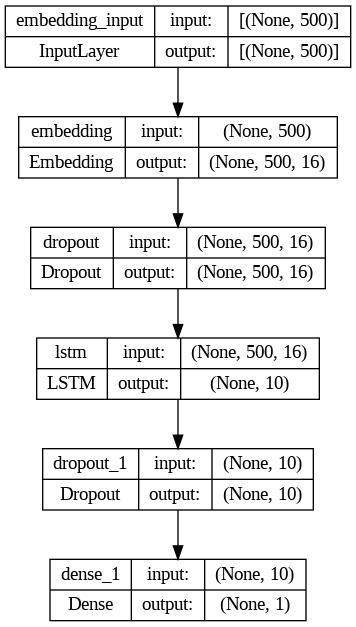

In [18]:
embedding_vector_length = 16
model_imdb = Sequential()
model_imdb.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model_imdb.add(Dropout(0.2))
model_imdb.add(LSTM(10))
model_imdb.add(Dropout(0.2))
model_imdb.add(Dense(1, activation='sigmoid'))
model_imdb.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_imdb.summary())
plot_model(model_imdb,show_shapes=True)


The history for the model above has been saved, as it takes a while to run. If you want to run it yourself then comment out the second line.


[]

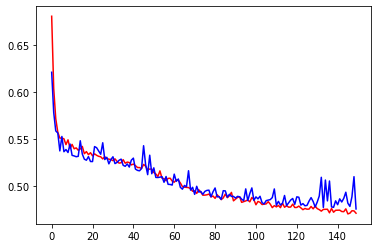

In [19]:
nepoch = 150
#IMDB_history = model_imdb.fit(X_train,Sc_train,validation_data=(X_test,Sc_test),epochs=nepoch,batch_size=256)
IMDB_history=np.load('IMDBTrainhist.npy',allow_pickle='TRUE').item()
plt.plot(range(nepoch),IMDB_history['loss'],c='r')
plt.plot(range(nepoch),IMDB_history['val_loss'],c='b')
plt.plot()

[]

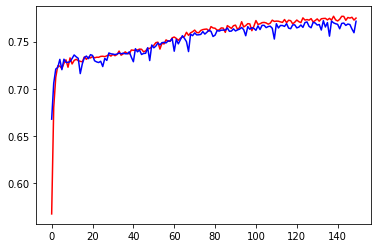

In [20]:
plt.plot(range(nepoch),IMDB_history['accuracy'],c='r')
plt.plot(range(nepoch),IMDB_history['val_accuracy'],c='b')
plt.plot()

### Final Submission (complete by Sunday 19/02/23)

Submit Tasks 1-5 in a single notebook this before the deadline on Sunday.


In [21]:
## Add additional code cells to implememt the tasks stated above 

## Reflection

There are no specific marks allocated for a reflection. However due consideration will be given if pertinent comments or valuable insights are made.